In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets.values

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
X["Target"] = y

<ipython-input-4-79ec813c86c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Target"] = y


<Axes: >

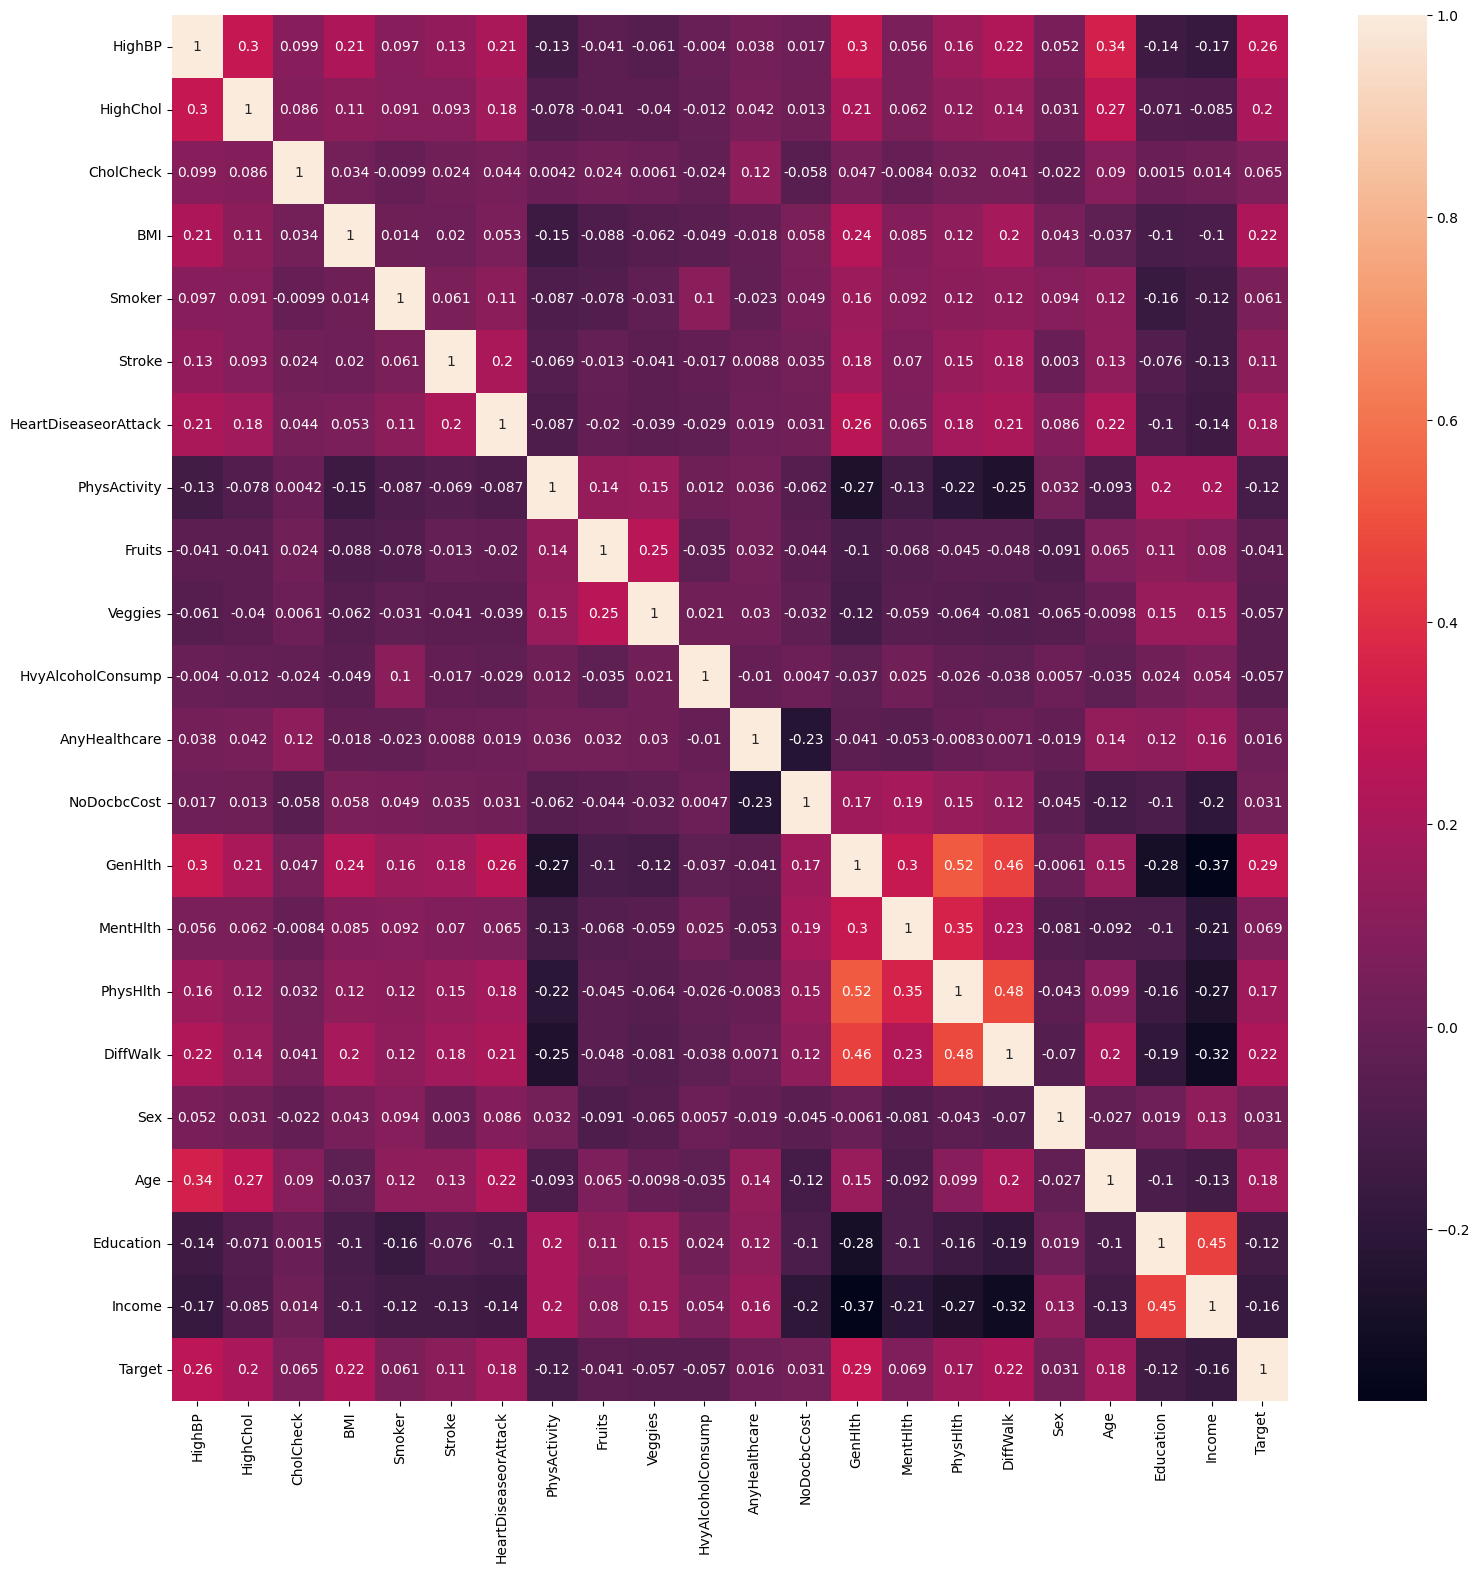

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(), annot=True)

In [ ]:
#lets drop a few columns that have negative correlation with the target variable. like PhysActivity, Education,Income
#lets start with this

X = X.drop(columns=['PhysActivity','Education','Income'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
X_res, y_res = sampler.fit_resample(X,y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   Fruits                253680 non-null  int64
 8   Veggies               253680 non-null  int64
 9   HvyAlcoholConsump     253680 non-null  int64
 10  AnyHealthcare         253680 non-null  int64
 11  NoDocbcCost           253680 non-null  int64
 12  GenHlth               253680 non-null  int64
 13  MentHlth              253680 non-null  int64
 14  PhysHlth              253680 non-null  int64
 15  DiffWalk              253680 non-n

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
type(cdc_diabetes_health_indicators)

ucimlrepo.dotdict.dotdict

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=15, activation='gelu'))
ann.add(tf.keras.layers.Dense(units=12, activation='gelu'))
ann.add(tf.keras.layers.Dense(units=10, activation='gelu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(X_train,y_train, batch_size=32, epochs=5)

Epoch 1/5
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9354 - loss: 0.1613
Epoch 2/5
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 1.0000 - loss: 2.0790e-04
Epoch 3/5
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 8.9930e-05
Epoch 4/5
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 1.0000 - loss: 5.5736e-05
Epoch 5/5
10917/10917 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 1.0000 - loss: 3.9924e-05


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=ann.predict(X_test)>0.5

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

2730/2730 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[43773     0]
 [    0 43561]]
1.0


<Axes: >

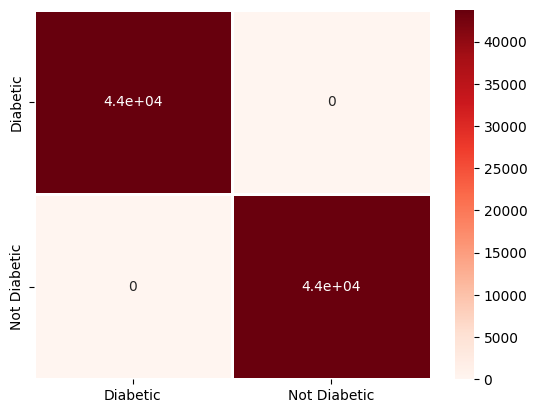

In [ ]:

sns.heatmap(data=confusion_matrix(y_pred,y_test), annot=True, linewidths=2, cmap='Reds',xticklabels=['Diabetic','Not Diabetic'],
            yticklabels=['Diabetic','Not Diabetic'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=ann.predict(X_train)>0.5

print(confusion_matrix(y_pred,y_train))
print(accuracy_score(y_train,y_pred))

10917/10917 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
[[174561      0]
 [     0 174773]]
1.0
